<a href="https://colab.research.google.com/github/bzimons/mvp_puc_1/blob/mvp_development/mvp1_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Análise de Dados e Boas Práticas
## Aluna: Beatriz Leal Simões e Silva

## 1. Definição do Problema

O dataset escolhido para a realização deste trabalho é sobre dados de séries de TV disponíveis em diversos serviços de *Streaming*. Este dataset permite observar a disponibilidade das séries em cada plataforma, são elas: **Netflix, Prime Video, Hulu e Disney + **. Também a avaliação de notas por usuários que assistiram de dois sites famosos para este tipo de conteúdo, o site **Rotten Tomatoes** e **IMDb**.

 A pontuação do site *Rotten Tomatoes* se chama **Tomatometer**, essa pontuação é baseada na porcentagem de críticas positivas que um filme ou programa de TV recebe de críticos profissionais, enquanto a  pontuação **IMDb** calcula suas pontuações com base na média das avaliações dos usuários.


A Netflix é um serviço de assinatura de streaming que oferece uma variedade de conteúdos, incluindo os originais exclusivos da Netflix. O Hulu é um serviço de streaming que combina uma biblioteca de conteúdo sob demanda com programação de TV ao vivo. O Prime Video é o serviço de streaming que também possui produções originais da Amazon. O Disney+ é um serviço de streaming que se concentra principalmente em conteúdo da Disney,incluindo séries originais da Disney.


Os dados foram obtidos na plataforma kaggle, o no link de acesso a base e as demais fontes do trabalho estarão disponíveis ao final do MVP.

O dataset é  composto dos seguintes atributos:

1.  **Row**: Index da linha
2.  **ID**: ID único da série de TV
3.  **Title**: Título da série
4.  **Year**: Ano de lançamento da série
5.  **Age**: Faixa etária recomendada
6.  **IMDb**: Nota do site IMDB
7.  **Rotten Tomatoes**: Nota do site Rotten Tomatoes
8.  **Netflix**: Se a série existe no Netflix (1 se sim, 0 se não)
9.  **Hulu**:  Se a série existe no Hulu (1 se sim, 0 se não)
10.  **Prime Video**:  Se a série existe no Prime Video (1 se sim, 0 se não)
11. **Type**: Se é filme ou série de TV


In [32]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, xlim, ylim, geom_jitter, geom_abline, theme_set, theme_bw, geom_histogram

## 2. Leitura dos dados e tratamento



In [2]:
# Leitura e visualização do cabeçalho
path_tv = "https://raw.githubusercontent.com/bzimons/mvp_puc_1/main/tv_shows.csv"
df_tv = pd.read_csv(path_tv)
df_tv.head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
5,5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,1
6,6,7,Peaky Blinders,2013,18+,8.8/10,93/100,1,0,0,0,1
7,7,8,The Walking Dead,2010,18+,8.2/10,93/100,1,0,0,0,1
8,8,9,Black Mirror,2011,18+,8.8/10,92/100,1,0,0,0,1
9,9,10,The Queen's Gambit,2020,18+,8.6/10,92/100,1,0,0,0,1


In [3]:
print(df_tv.shape)

(5368, 12)


In [4]:
print(df_tv.isnull().any())

Row                False
ID                 False
Title              False
Year               False
Age                 True
IMDb                True
Rotten Tomatoes    False
Netflix            False
Hulu               False
Prime Video        False
Disney+            False
Type               False
dtype: bool


À primeira vista, podemos notar a necessidade de realizar certos tratamentos aos dados, como a presença de dados faltantes nas colunas "Age" e "IMDb.

As colunas **Rotten Tomatoes (RT)** e **IMDb** possuem a nota de avaliação da série sendo um valor de 0 à 10 ou de 0 à 100. Estas colunas podem ser facilmente transformadas em valores numéricos. Em ambas colunas a melhor estratégia será remover os últimos dígitos, pois é o padrão identificável ao observar os valores únicos para depois converte-las para *float*. A variável RT será dividida por 10, desta forma ambas colunas de notas estarão normalizadas na mesma escala.

In [5]:
unique_IMDb = df_tv['IMDb'].unique()
print(unique_IMDb)

['9.4/10' '8.7/10' '9.0/10' '8.8/10' '9.3/10' '8.2/10' '8.6/10' '8.5/10'
 '8.3/10' '8.1/10' '8.4/10' '8.0/10' '7.6/10' '9.1/10' '7.5/10' '7.7/10'
 '8.9/10' '7.9/10' '7.8/10' '7.2/10' '6.8/10' '7.3/10' '7.4/10' '6.2/10'
 '6.5/10' '6.7/10' '7.1/10' '5.4/10' '6.1/10' '4.9/10' '6.4/10' '6.9/10'
 '6.6/10' '7.0/10' '5.9/10' '5.8/10' '6.3/10' '4.6/10' '5.5/10' '6.0/10'
 '5.7/10' '5.0/10' '3.4/10' '4.7/10' '5.3/10' '4.3/10' '5.6/10' '3.8/10'
 '5.1/10' '3.9/10' '4.5/10' nan '5.2/10' '4.8/10' '3.5/10' '4.2/10'
 '3.6/10' '4.4/10' '3.7/10' '1.1/10' '3.3/10' '4.1/10' '4.0/10' '2.5/10'
 '2.7/10' '3.2/10' '2.3/10' '9.2/10' '2.8/10' '3.1/10' '1.8/10' '3.0/10'
 '2.6/10' '1.9/10' '1.5/10' '2.9/10' '2.4/10' '9.5/10' '9.6/10']


In [6]:
unique_tomatoes = df_tv['Rotten Tomatoes'].unique()
print(unique_tomatoes)

['100/100' '96/100' '95/100' '94/100' '93/100' '92/100' '90/100' '89/100'
 '88/100' '87/100' '86/100' '85/100' '84/100' '83/100' '82/100' '81/100'
 '80/100' '79/100' '78/100' '77/100' '76/100' '75/100' '74/100' '73/100'
 '72/100' '71/100' '70/100' '69/100' '68/100' '67/100' '66/100' '65/100'
 '64/100' '63/100' '62/100' '61/100' '60/100' '59/100' '58/100' '57/100'
 '56/100' '55/100' '54/100' '53/100' '52/100' '51/100' '50/100' '49/100'
 '48/100' '47/100' '46/100' '45/100' '44/100' '43/100' '42/100' '41/100'
 '40/100' '39/100' '38/100' '37/100' '36/100' '35/100' '34/100' '33/100'
 '32/100' '31/100' '30/100' '29/100' '28/100' '27/100' '26/100' '25/100'
 '24/100' '23/100' '22/100' '21/100' '20/100' '19/100' '18/100' '17/100'
 '16/100' '14/100' '13/100' '10/100' '91/100']


In [14]:
#tratamento das colunas
df_tv_fix = df_tv.copy()
df_tv_fix = df_tv_fix.dropna(subset=['IMDb'], axis=0)
df_tv_fix['IMDb'] = df_tv_fix['IMDb'].str.replace('/10$','',regex=True).astype(float)
df_tv_fix['Rotten Tomatoes'] = df_tv_fix['Rotten Tomatoes'].str.replace('/100$','',regex=True).astype(float)
df_tv_fix['Rotten Tomatoes'] = df_tv_fix['Rotten Tomatoes']/10
df_tv_fix.head(5)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4,10.0,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7,9.6,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0,9.5,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8,9.4,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8,9.3,1,0,0,0,1


Como a coluna de avaliações das séries que possuem valores vazios é apenas a coluna "IMDb", Aamelhor estratégia de obter a nota "IMDb" seria utilizar a nota equivalente do "Rotten Tomatoes". Porém,considerando que um dos objetivos da análise é uma comparação entre a variação das duas notas, igualar esta nota não traria benefícios para a análise comparativa. Portanto, as séries que não possuem nota na coluna "IMDb" seráo removidas do *dataset*. Assim, 962 linhas serão removidas.


In [86]:
print(df_tv_fix.shape)

(4406, 14)


In [9]:
print(df_tv_fix.isnull().any())

Row                False
ID                 False
Title              False
Year               False
Age                 True
IMDb               False
Rotten Tomatoes    False
Netflix            False
Hulu               False
Prime Video        False
Disney+            False
Type               False
dtype: bool


In [20]:
df_tv_fix.describe()

,Row,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000
mean,2358.827054,2464.940536,2012.486382,7.086019,5.380958,0.425556,0.321834,0.268271,0.071493,1.0,1.809192
std,1457.867468,1569.530988,10.244953,1.114977,1.434426,0.494483,0.467233,0.443109,0.257677,0.0,1.207201
min,0.000000,1.000000,1934.000000,1.100000,2.300000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1102.250000,1105.250000,2011.000000,6.500000,4.300000,0.000000,0.000000,0.000000,0.000000,1.0,0.800000
50%,2296.500000,2357.500000,2016.000000,7.300000,5.200000,0.000000,0.000000,0.000000,0.000000,1.0,1.700000
75%,3596.750000,3799.750000,2019.000000,7.900000,6.300000,1.000000,1.000000,1.000000,0.000000,1.0,2.600000
max,5343.000000,5692.000000,2021.000000,9.600000,10.000000,1.000000,1.000000,1.000000,1.000000,1.0,5.900000


In [19]:
df_tv_fix.dtypes

Row                  int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
diferenca_nota     float64
dtype: object

Agora com as notas ajustadas, podemos fazer as primeiras visualizações:

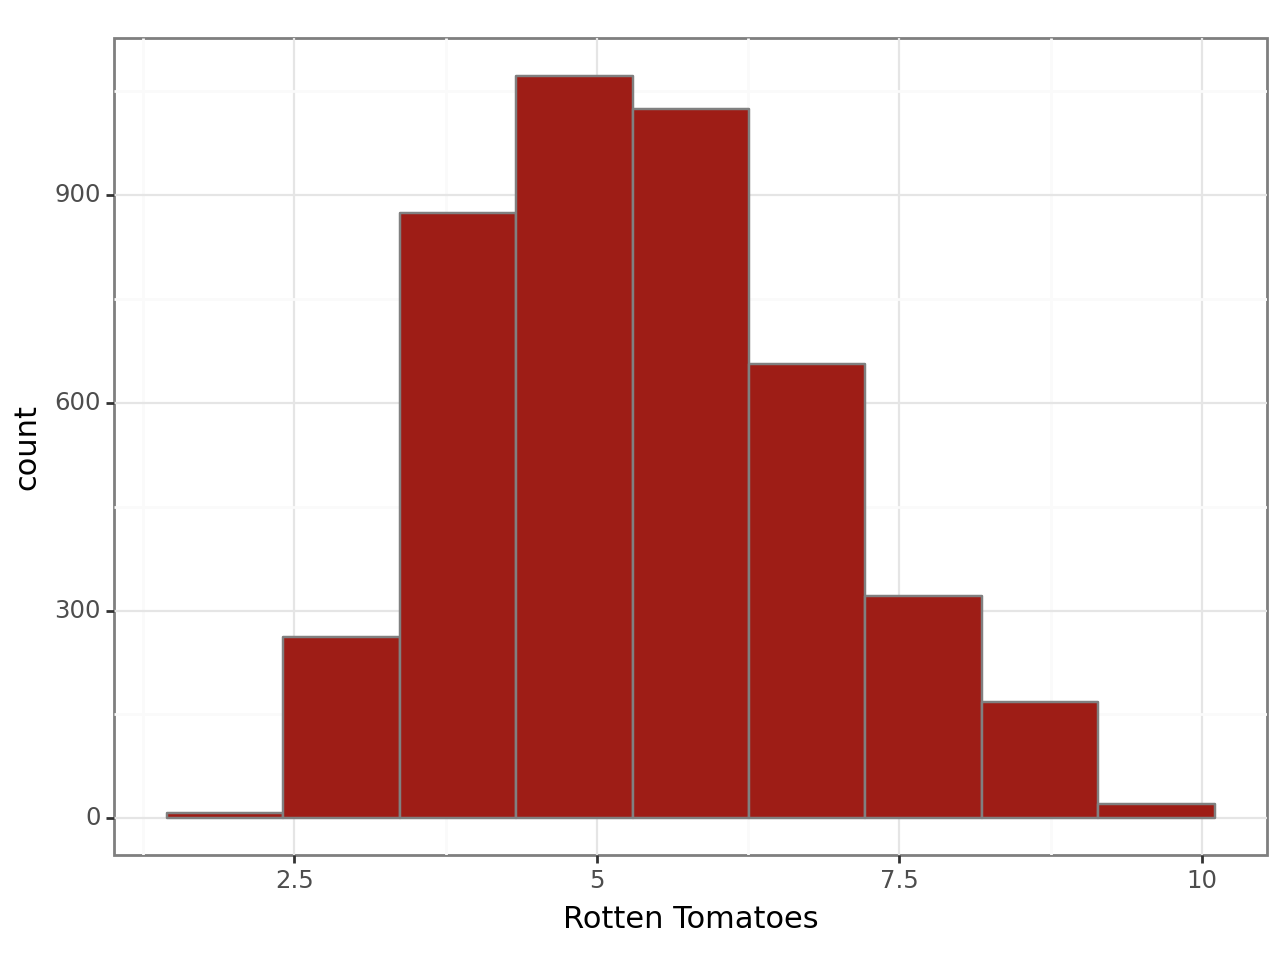

<Figure Size: (640 x 480)>

In [101]:
(
 ggplot(df_tv_fix, aes(x='Rotten Tomatoes')) +
  geom_histogram(fill='#9e1d16',colour='grey',bins = 9) +
  theme_set(theme_bw())
)


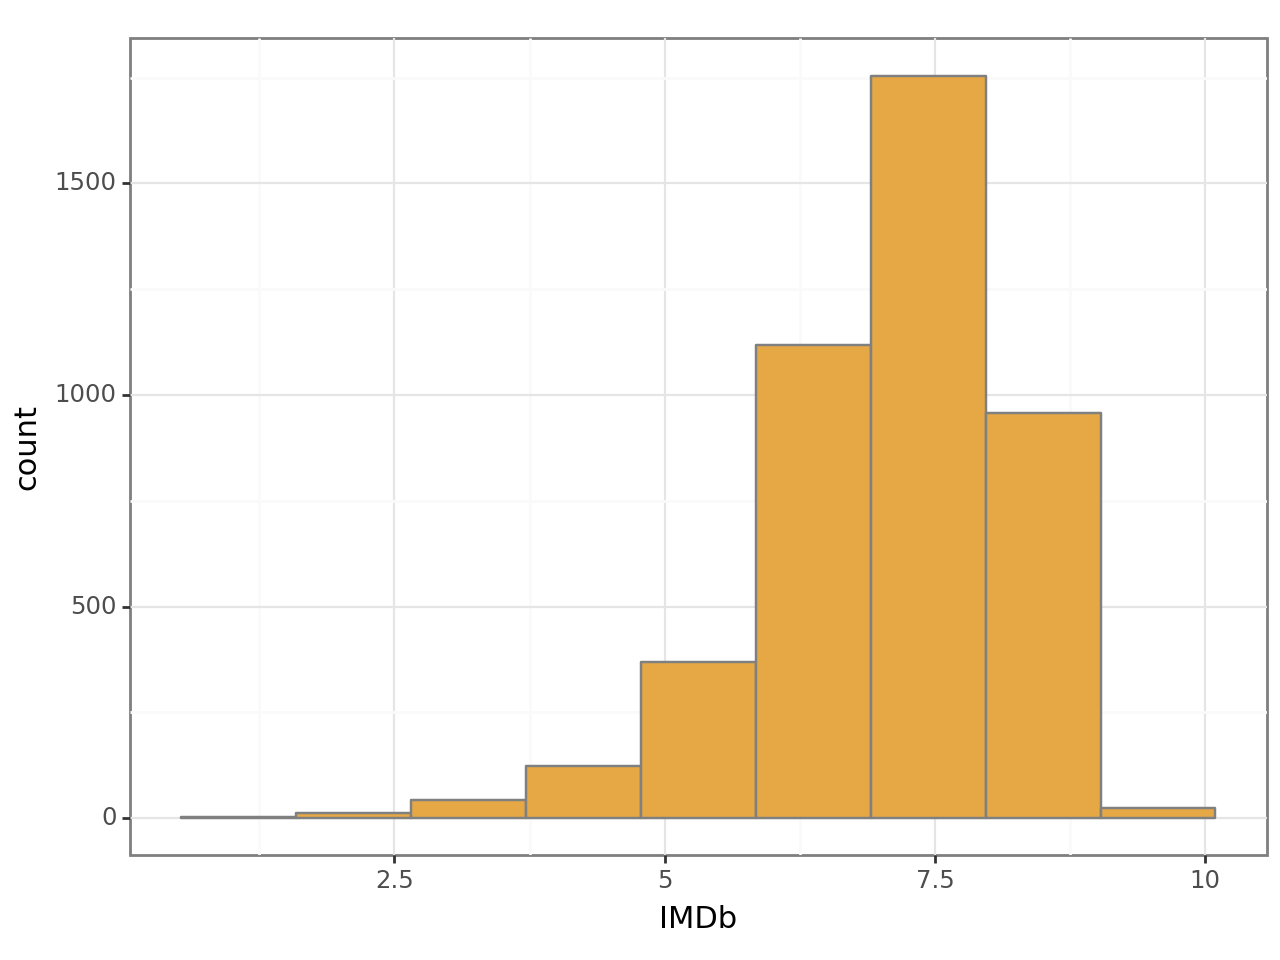

<Figure Size: (640 x 480)>

In [102]:
(
 ggplot(df_tv_fix, aes(x='IMDb')) +
  geom_histogram(fill='#e6a845',colour='grey',bins = 9) +
  theme_set(theme_bw())
)

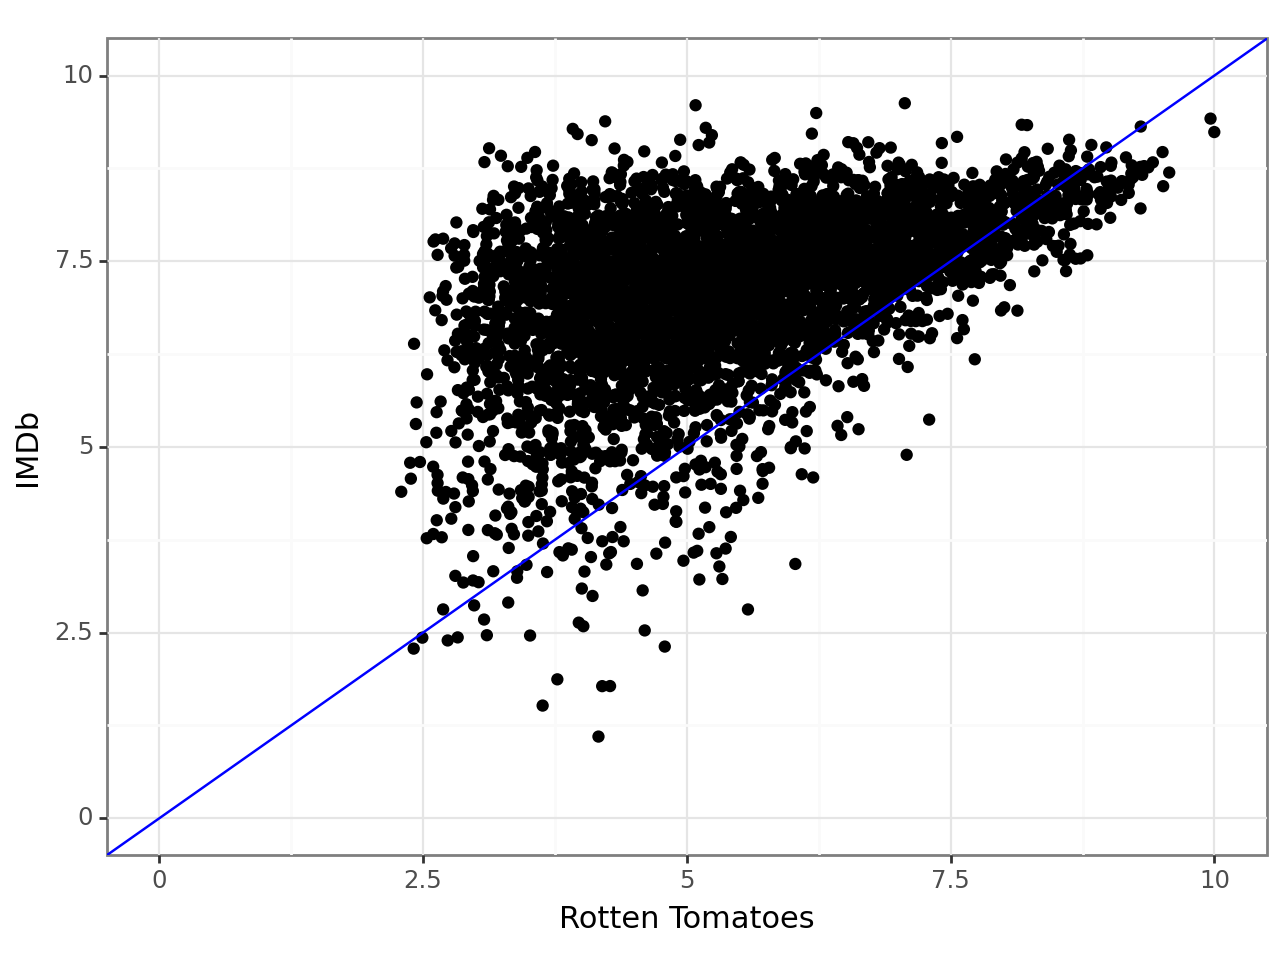

<Figure Size: (640 x 480)>

In [17]:


(
    ggplot(df_tv_fix)
    + aes(x="Rotten Tomatoes", y="IMDb")
    + geom_jitter()
    + geom_abline(intercept=0,slope=1,colour="blue")
    + xlim(0,10)
    + ylim(0,10)
    + theme_set(theme_bw())
)

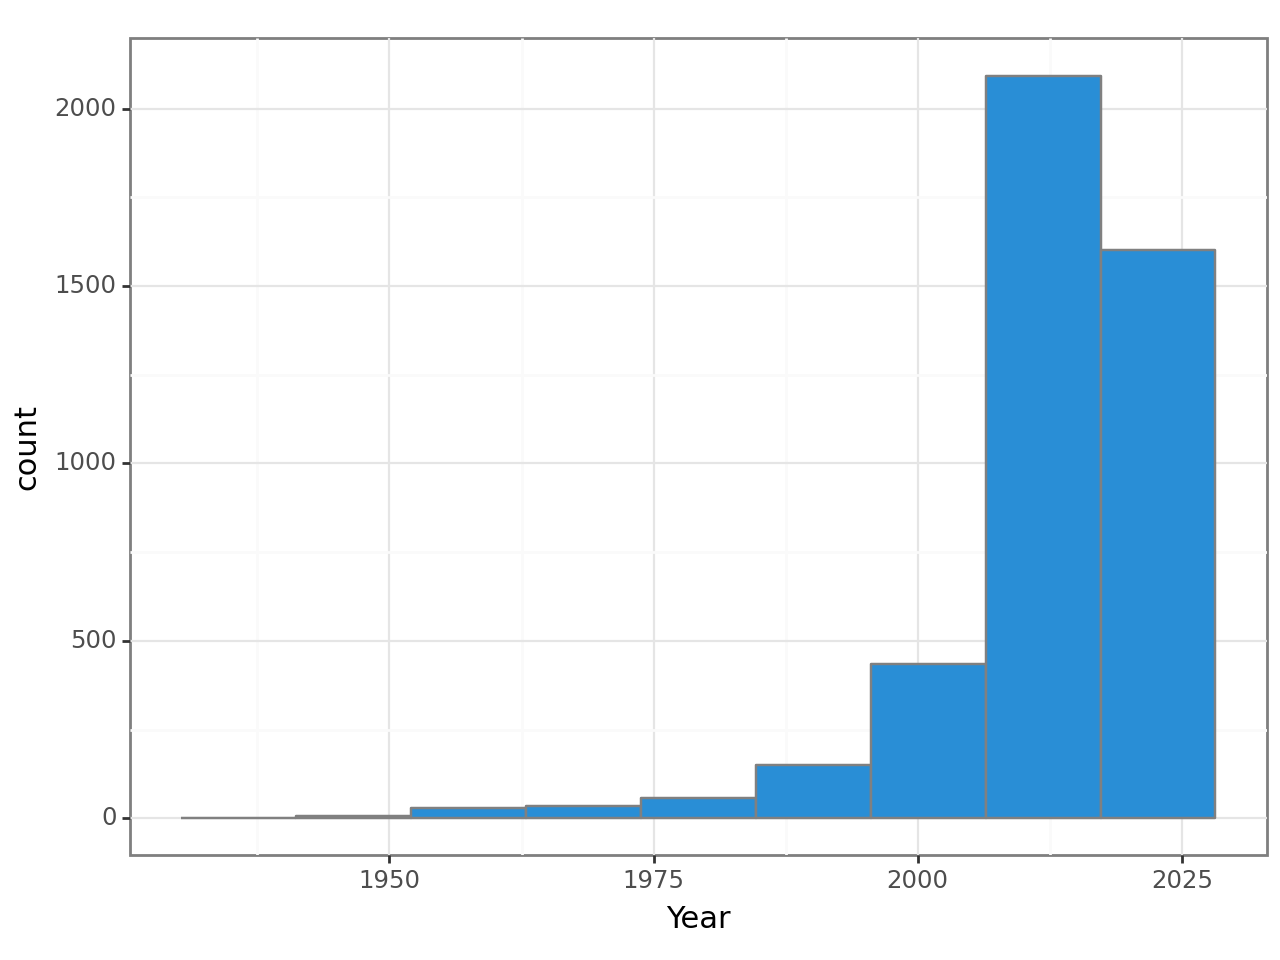

<Figure Size: (640 x 480)>

In [64]:
(
 ggplot(df_tv_fix, aes(x='Year')) +
  geom_histogram(fill='#298ed6',colour='grey',bins = 9) +
  theme_set(theme_bw())
)


Neste gráfico de dispersão entre as notas de ambos os sites IMDb e Rotten Tomatoes (RT), podemos ver claramente que existe uma superestimação das notas do IMDb em relação ao RT. O mais provável são as notas de críticos de cinema tenderem a ser mais rigorosas que as notas dos usuários padrões, ou seja, pessoas comuns que assistem as séries e filmes não tendem a ter o olhar rigoroso e nem o estudo da arte do cinema que um crítico profissional é treinado para ter.

Pelo histograma dos anos, vemos uma clara "explosão" de conteúdo a partir dos anos 2000.

#### Esta relação abre portas para uma análise de curiosidade: qual devem ser as séries com maior e menor diferença entre notas?

In [18]:
df_tv_fix['diferenca_nota'] = (df_tv_fix['Rotten Tomatoes'] - df_tv_fix['IMDb']).apply(np.abs)

In [58]:
df_dif_nota_0 = df_tv_fix.loc[df_tv_fix['diferenca_nota']==0]
df_dif_nota_0.sort_values(by=['IMDb'],ascending=False).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
5,5,6,Avatar: The Last Airbender,2005,7+,9.3,9.3,1,0,1,0,1,0.0
1959,1959,1971,Firefly,2002,16+,9.0,9.0,0,1,0,0,1,0.0
30,30,31,Arrested Development,2003,16+,8.7,8.7,1,1,0,0,1,0.0
1973,1973,1987,Freaks and Geeks,1999,16+,8.7,8.7,0,1,0,0,1,0.0
1972,1972,1986,This Is Us,2016,16+,8.7,8.7,0,1,1,0,1,0.0
1970,1970,1984,Line of Duty,2012,18+,8.7,8.7,0,1,1,0,1,0.0
1979,1979,1997,Adventure Time,2010,7+,8.6,8.6,0,1,0,0,1,0.0
1977,1977,1993,Archer,2009,18+,8.6,8.6,0,1,0,0,1,0.0
40,40,41,Star Trek: The Next Generation,1987,7+,8.6,8.6,1,1,1,0,1,0.0
55,55,56,Marvel's The Punisher,2017,18+,8.5,8.5,1,0,0,0,1,0.0


In [59]:
df_dif_nota_0.sort_values(by=['IMDb'],ascending=True).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
1503,1503,1509,One on One with Kirk Cameron,2019,NaN,4.2,4.2,1,0,0,0,1,0.0
3992,3992,4274,Charlie's Angels,2011,16+,4.4,4.4,1,0,1,0,1,0.0
2975,2975,3100,Indebted,2020,NaN,4.5,4.5,0,1,0,0,1,0.0
1365,1365,1369,All About the Washingtons,2018,all,4.5,4.5,1,0,0,0,1,0.0
1319,1319,1322,The Big Day,2021,18+,4.6,4.6,1,0,0,0,1,0.0
1103,1103,1106,Rabbids Invasion,2013,7+,5.0,5.0,1,1,0,0,1,0.0
2702,2702,2807,Top Gear,2010,7+,5.4,5.4,0,1,1,0,1,0.0
887,887,890,Netflix Presents: The Characters,2016,18+,5.4,5.4,1,0,0,0,1,0.0
833,833,836,PJ Masks,2015,all,5.5,5.5,1,0,0,1,1,0.0
2602,2602,2703,Fear Factor,2001,7+,5.6,5.6,0,1,0,0,1,0.0


In [23]:
df_tv_fix.sort_values(by=['diferenca_nota'],ascending=False).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
3239,3239,3371,LittleBabyBum,2011,NaN,9.0,3.1,0,1,0,0,1,5.9
3233,3233,3365,Los Cowboys,2015,NaN,8.8,3.1,0,1,0,0,1,5.7
4365,4365,4664,Today's Homeowner with Danny Lipford,1998,all,8.9,3.2,0,0,1,0,1,5.7
4349,4349,4648,Fresh Tracks,2016,NaN,8.8,3.3,0,0,1,0,1,5.5
4311,4311,4609,Xploration DIY Sci,2016,all,8.8,3.4,0,0,1,0,1,5.4
3115,3115,3246,Hungry Henry,2014,NaN,9.3,3.9,0,1,0,0,1,5.4


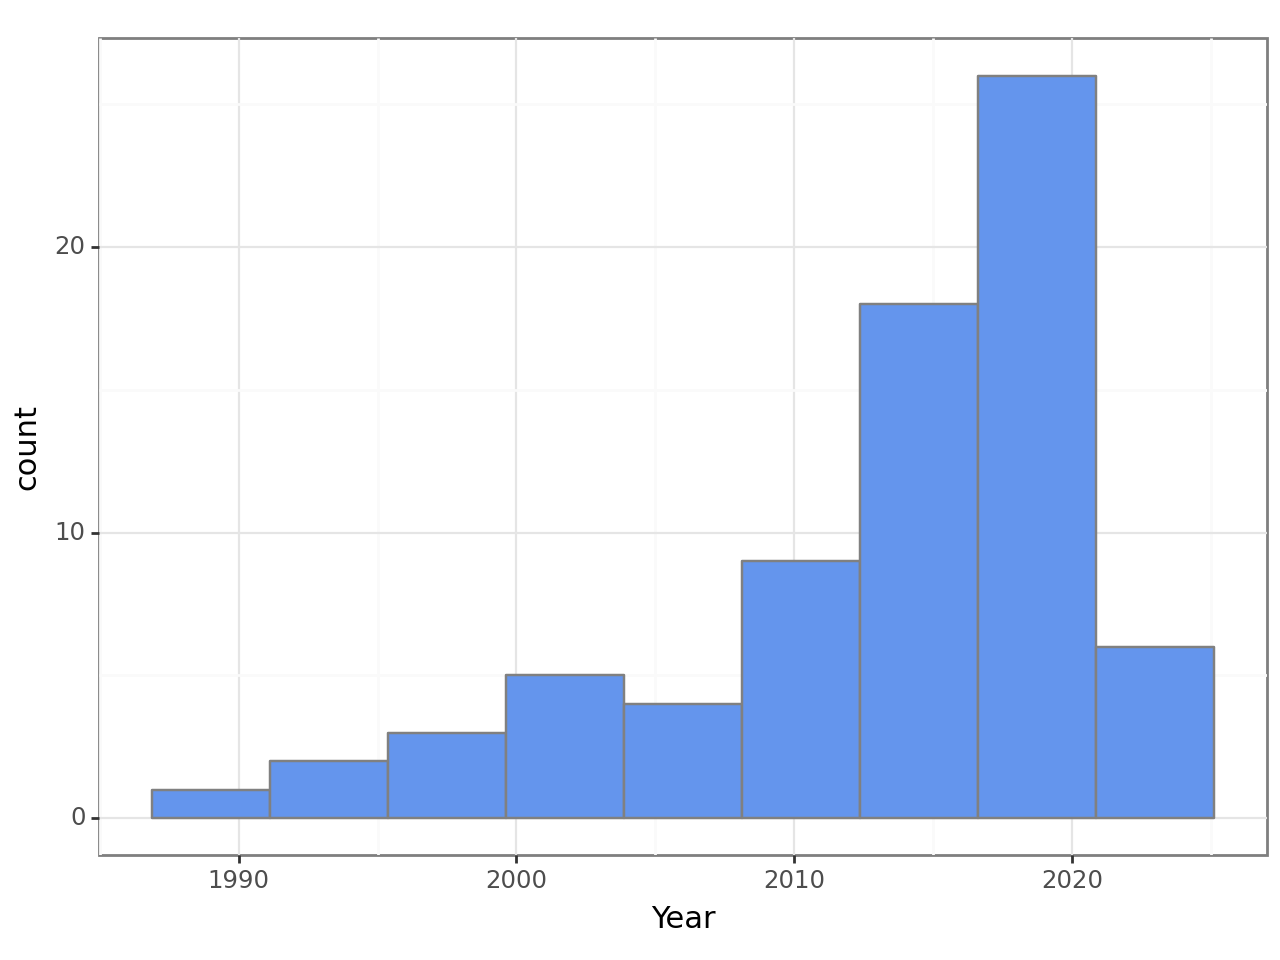

<Figure Size: (640 x 480)>

In [55]:
(
 ggplot(df_dif_nota_0, aes(x='Year')) +
  geom_histogram(fill='cornflowerblue',colour='grey',bins = 9) +
  theme_set(theme_bw())
)



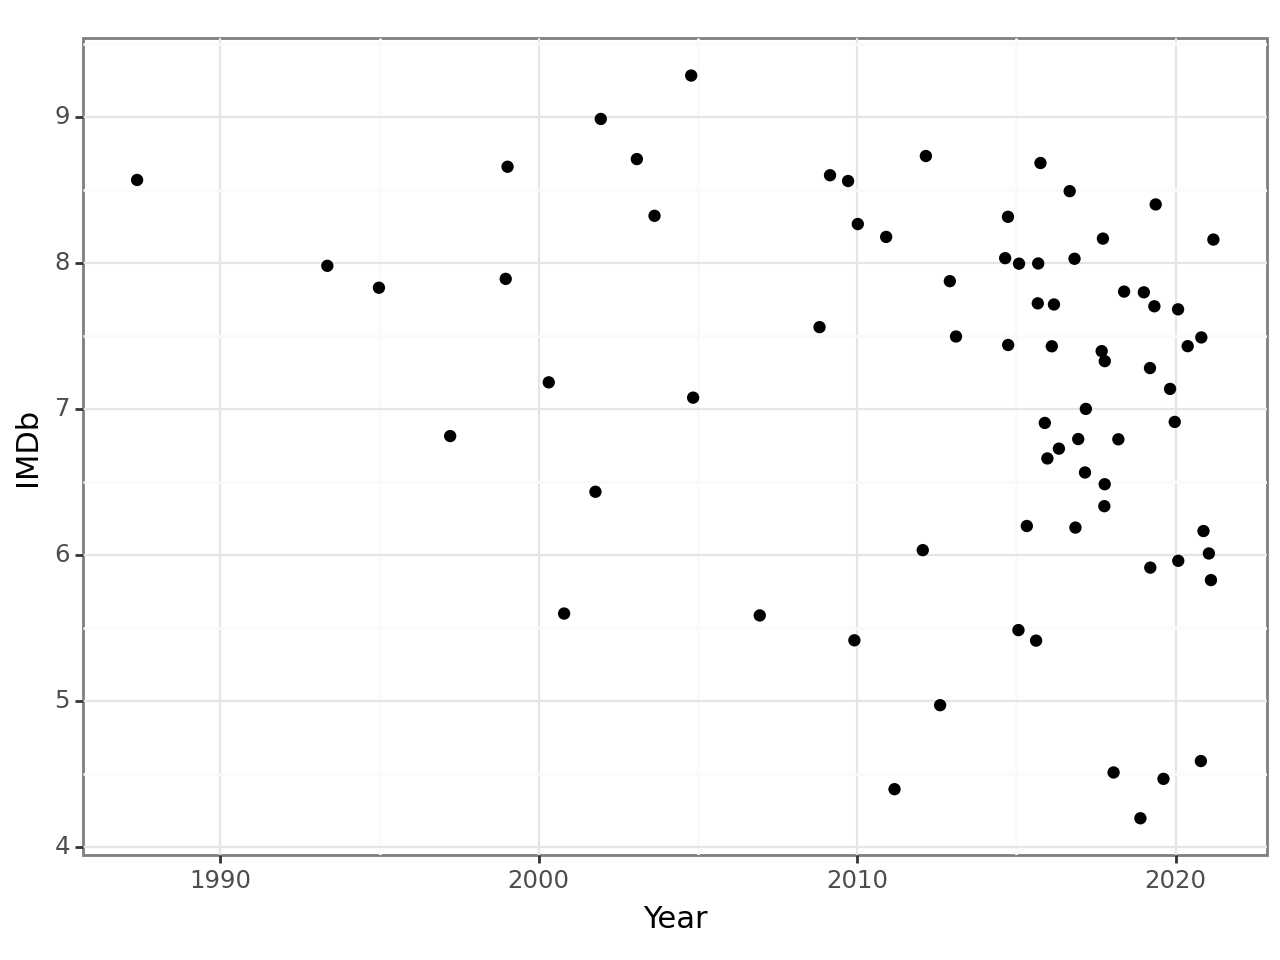

<Figure Size: (640 x 480)>

In [56]:

(
    ggplot(df_dif_nota_0)
    + aes(x="Year", y="IMDb")
    + geom_jitter()
    + theme_set(theme_bw())
)

ao olhar os dois cortes do dataframe, percebemos que as séries com menor variedade das  notas e avaliações altas, são séries muito bem conhecidas na cultura popular, mas temos no gráfico de dispersão a percepção que nem todas as séries que possuem consenso entre as duas plataformas são bem avaliadas. De modo a dizer que, algumas séries são ruins em ambas. Além disso, pelo histograma, ao longo dos anos houve uma crescente de quantidade séries com notas iguais em ambas plataformas, com exceção de após ano de 2020, devido a pandemia do Coronavírus, muitos lançamentos foram adiados.

ao observamos as serie com maiores discrepância entre as notas, é fácil ver que muitas não possuem a idade recomendada definida. Portanto podemos afirmar que algumas destas séries são desconhecidas de modo geral.

Uma das limitações de utilização desta base de dados é não conseguir atribuir uma certa confiabilidade das notas. Como não sabemos o número da amostra dos críticos/usuários que avaliaram a série, não podemos descrever melhor se a nota de cada série em cada plataforma é estatisticamente significante.

### x. Quais serviços de Streaming mais possui conteúdo de séries de TV? Existem séries que estão em todas as plataformas?

In [90]:
df_tv_fix['streaming_soma'] = df_tv_fix['Netflix'] + df_tv_fix['Disney+'] + df_tv_fix['Hulu'] + df_tv_fix['Prime Video']
df_tv_fix.sort_values(by=['streaming_soma'],ascending=False).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota,streaming_soma
2115,2115,2152,Genius,2017,16+,8.3,7.4,1,1,1,1,1,0.9,4
5231,5231,5575,Pick of the Litter,2019,7+,8.1,4.7,1,1,0,1,1,3.4,3
218,218,219,Pokémon,1997,7+,7.5,7.3,1,1,1,0,1,0.2,3
537,537,540,60 Days In,2016,16+,7.7,6.2,1,1,1,0,1,1.5,3
670,670,673,The Game,2006,16+,6.7,5.9,1,1,1,0,1,0.8,3
515,515,518,Big Time Rush,2009,all,6.4,6.3,1,1,1,0,1,0.1,3
2009,2009,2034,Cosmos,2014,all,9.3,8.2,0,1,1,1,1,1.1,3
37,37,38,American Horror Story,2011,18+,8.0,8.6,1,1,1,0,1,0.6,3
40,40,41,Star Trek: The Next Generation,1987,7+,8.6,8.6,1,1,1,0,1,0.0,3
356,356,358,Ancient Aliens,2010,7+,7.2,6.7,1,1,1,0,1,0.5,3


In [96]:
df_tv_fix.shape

(4406, 14)

In [98]:
# quantas séries estão nos serviços:
print('Apenas em um serviço de Streaming:',df_tv_fix['streaming_soma'].loc[df_tv_fix['streaming_soma']==1].count())
print('Em mais de um serviço de Streaming:',df_tv_fix['streaming_soma'].loc[df_tv_fix['streaming_soma']>1].count())

Apenas em um serviço de Streaming: 4058
Em mais de um serviço de Streaming: 348


In [91]:
print('Netflix:', df_tv_fix['Netflix'].sum())
print('Hulu:', df_tv_fix['Hulu'].sum())
print('Prime Video:', df_tv_fix['Prime Video'].sum())
print('Disney+:', df_tv_fix['Disney+'].sum())

Netflix: 1875
Hulu: 1418
Prime Video: 1182
Disney+: 315


Apenas a série "Genius" está em todas as plataformas, mas muitas outras estão em mais de uma. Do universo desse dados de 4406 séries de TV, 4058

## x. Fontes:


* https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney  (acessado em 19/11/2023)
*   https://www.rottentomatoes.com (acessado em 28/11/2023)
*   https://www.imdb.com  (acessado em 28/11/2023)

